In [1]:
#### 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os


# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

In [2]:
# CSV 파일 불러오기
df = pd.read_csv('/Users/kimgayeong/Desktop/데이터톤/data 3/실습데이터.csv') 

In [3]:
df1 = pd.read_csv('/Users/kimgayeong/Desktop/데이터톤/data 3/raw_total_data.csv')

In [4]:
columns_to_drop = [
    'KO6_MOTOR_SET_FREQ.xlsx', 'KO6_MOTOR_CURR.xlsx', 'KO6_MOTOR_INVERTER_ALM.xlsx',
    'TRANS_POS_LEFT.xlsx', 'TRANS_POS_RIGHT.xlsx', 'TRANS_POS_UP.xlsx', 'TRANS_POS_DOWN.xlsx',
    'TRANS_POS_LEFT_SET_H.xlsx', 'TRANS_POS_RIGHT_SET_H.xlsx', 'TRANS_POS_UP_SET_H.xlsx', 'TRANS_POS_DOWN_SET_H.xlsx',
    'TRANS_POS_LEFT_SET_L.xlsx', 'TRANS_POS_RIGHT_SET_L.xlsx', 'TRANS_POS_UP_SET_L.xlsx', 'TRANS_POS_DOWN_SET_L.xlsx'
]

df = df.drop(columns=columns_to_drop, errors='ignore')

In [5]:
columns_to_drop = [
    'KO6_MOTOR_SET_FREQ.xlsx', 'KO6_MOTOR_CURR.xlsx', 'KO6_MOTOR_INVERTER_ALM.xlsx',
    'TRANS_POS_LEFT.xlsx', 'TRANS_POS_RIGHT.xlsx', 'TRANS_POS_UP.xlsx', 'TRANS_POS_DOWN.xlsx',
    'TRANS_POS_LEFT_SET_H.xlsx', 'TRANS_POS_RIGHT_SET_H.xlsx', 'TRANS_POS_UP_SET_H.xlsx', 'TRANS_POS_DOWN_SET_H.xlsx',
    'TRANS_POS_LEFT_SET_L.xlsx', 'TRANS_POS_RIGHT_SET_L.xlsx', 'TRANS_POS_UP_SET_L.xlsx', 'TRANS_POS_DOWN_SET_L.xlsx'
]

df1 = df1.drop(columns=columns_to_drop, errors='ignore')

In [7]:
# 'Main Motor'라는 문자열이 컬럼명에 포함된 컬럼만 추출
main_motor_columns = [col for col in df.columns if 'MAIN_MOTOR' in col]

# 해당 컬럼들의 데이터만 추출
main_motor_data = df[main_motor_columns]

# 결과 확인
print(main_motor_data.head())  # 또는 display(main_motor_data) in Jupyter

   MAIN_MOTOR_CURR.xlsx  MAIN_MOTOR_RPM.xlsx  MAIN_MOTOR_SET_FREQ.xlsx  \
0                2192.5               8524.0                    2166.5   
1                4108.0               8524.0                    2166.5   
2                4158.0               8524.0                    2166.5   
3                4118.0               8524.0                    2166.5   
4                4063.0               8524.0                    2166.5   

   MAIN_MOTOR_ALM.xlsx  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  


In [13]:
import pandas as pd
# 컬럼명 앞뒤 공백 제거
df.columns = df.columns.str.strip()

# 효율성 계산
df['EFFICIENCY'] = df['MAIN_MOTOR_RPM.xlsx'] / df['MAIN_MOTOR_SET_FREQ.xlsx']

# IQR 방식으로 "정상 범위" 산출
Q1 = df['EFFICIENCY'].quantile(0.25)
Q3 = df['EFFICIENCY'].quantile(0.75)
IQR = Q3 - Q1

# 정상 범위 계산 (이상치 탐지 X, 단순 구간 산출용)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 출력
print(f"✅ 정상 효율 범위 (IQR 기준): {round(lower_bound, 3)} ~ {round(upper_bound, 3)}")

# 참고로 분포 확인 (선택)
# print(df['EFFICIENCY'].describe())

✅ 정상 효율 범위 (IQR 기준): 2.999 ~ 3.001


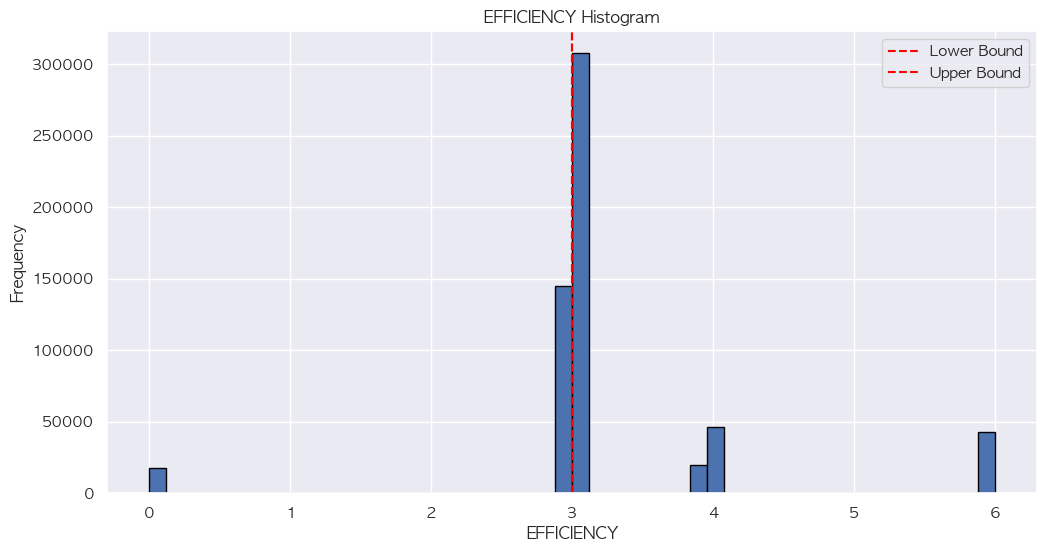

In [14]:
import matplotlib.pyplot as plt

plt.hist(df['EFFICIENCY'], bins=50, edgecolor='black')
plt.axvline(x=2.999, color='red', linestyle='--', label='Lower Bound')
plt.axvline(x=3.001, color='red', linestyle='--', label='Upper Bound')
plt.title('EFFICIENCY Histogram')
plt.xlabel('EFFICIENCY')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# 정상구간 먼저 설정
import pandas as pd

# 효율성 계산: RPM / SET_FREQ
df['EFFICIENCY'] = df['MAIN_MOTOR_RPM.xlsx'] / df['MAIN_MOTOR_SET_FREQ.xlsx']

# IQR 계산
Q1 = df['EFFICIENCY'].quantile(0.25)
Q3 = df['EFFICIENCY'].quantile(0.75)
IQR = Q3 - Q1

# 정상 구간 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 여부 판단
df['IS_ABNORMAL'] = ~df['EFFICIENCY'].between(lower_bound, upper_bound)

# 결과 출력
print("정상 효율 범위:", round(lower_bound, 2), "~", round(upper_bound, 2))
print(df[['MAIN_MOTOR_RPM.xlsx', 'MAIN_MOTOR_SET_FREQ.xlsx', 'EFFICIENCY', 'IS_ABNORMAL']].head())

# (선택) 이상치만 따로 보기
abnormal_df = df[df['IS_ABNORMAL']]
print("\n이상치 데이터 개수:", len(abnormal_df))

정상 효율 범위: 3.0 ~ 3.0
   MAIN_MOTOR_RPM.xlsx  MAIN_MOTOR_SET_FREQ.xlsx  EFFICIENCY  IS_ABNORMAL
0               8524.0                    2166.5    3.934456         True
1               8524.0                    2166.5    3.934456         True
2               8524.0                    2166.5    3.934456         True
3               8524.0                    2166.5    3.934456         True
4               8524.0                    2166.5    3.934456         True

이상치 데이터 개수: 230148


### 정상범위를 먼저 구하고, 정상범위와의 차이로 효율을 구분을 하려고 했으나 => 두 컬럼의 값이 일정한 값이라, 정상범위가 거의 3으로 나옴. -> 무의미.

## 1. 효율성: RPM(회전 속도)/Freq(주파수): 설정 주파수당 얼마나 회전 하는가?

count    579290.000000
mean          3.237983
std           0.997245
min           0.000000
25%           2.999654
50%           3.000000
75%           3.000000
max           6.000000
Name: EFFICIENCY, dtype: float64


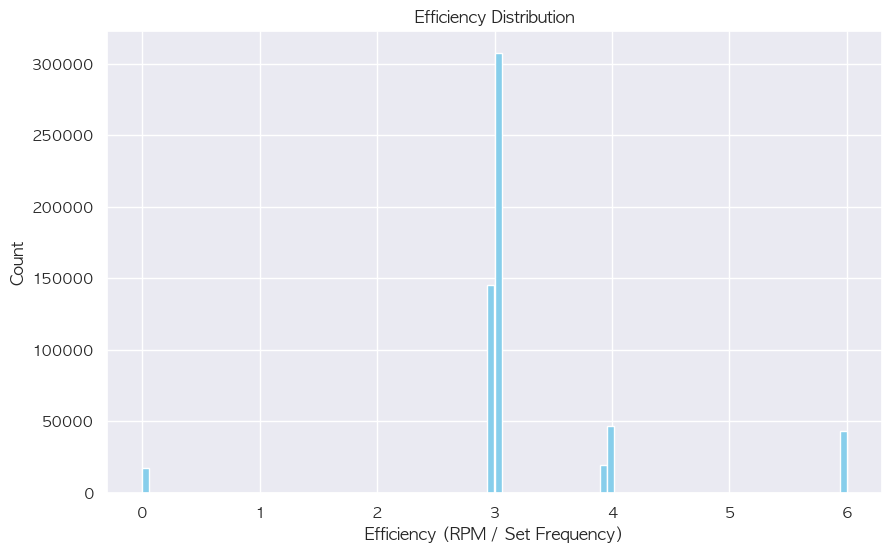

In [17]:
import pandas as pd

# 예시: 이미 데이터프레임 df에 데이터가 있다고 가정

# 효율 컬럼 생성
df['EFFICIENCY'] = df['MAIN_MOTOR_RPM.xlsx'] / df['MAIN_MOTOR_SET_FREQ.xlsx']

# 기본 통계 확인
print(df['EFFICIENCY'].describe())

# 효율 분포 시각화 (선택)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['EFFICIENCY'].dropna(), bins=100, color='skyblue')
plt.title('Efficiency Distribution')
plt.xlabel('Efficiency (RPM / Set Frequency)')
plt.ylabel('Count')
plt.show()

- 효율 값이 3인 구간에 데이터가 많다는 건 그 구간이 대표적인 운전 상태일 가능성이 크다.(모터가 설정 주파수 대비 RPM이 3배 가까이 나온다는 뜻)
- 정상 범위인지 확인 필요 (설비 스펙, 기술문서 참고)
- 0 또는 이상치 값이 포함되어 왜곡된 건 아닌지 점검 필요
- => 정상수치: 2.999~3.001 : 효율 값이 거의 3에 집중(설비가 아주 일정하고 안정적으로 운영되고 있다는 강력한 신호/ 변동이 거의 없어서 IQR(사분위 범위)이 매우 좁음.)

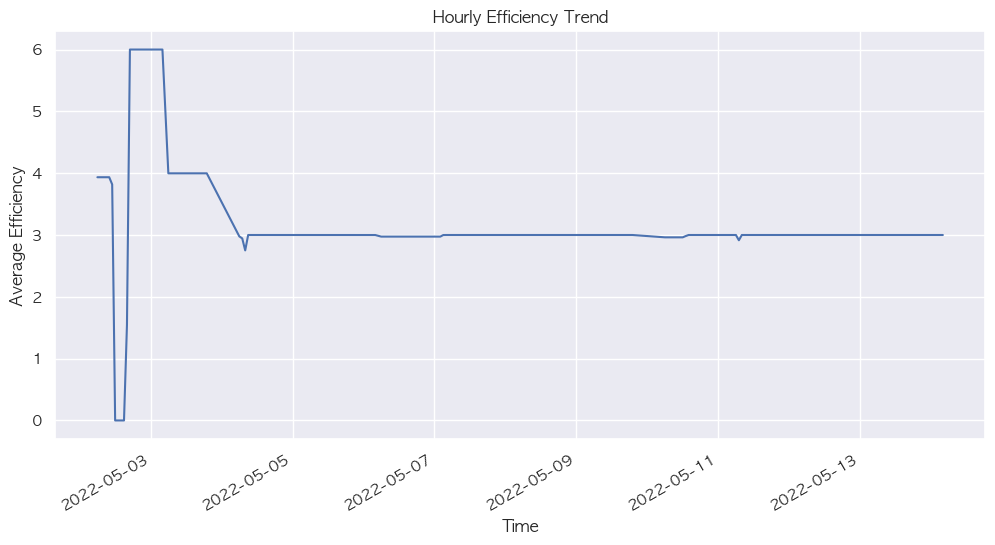

In [18]:
## 2. 시간대별 효율 변화 추이
# 예시: 'Timestamp' 컬럼이 datetime 형식이라고 가정
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 시간별 평균 효율 계산
efficiency_hourly = df.groupby(df['Timestamp'].dt.floor('H'))['EFFICIENCY'].mean()

# 시계열 그래프 그리기
plt.figure(figsize=(12,6))
efficiency_hourly.plot()
plt.title('Hourly Efficiency Trend')
plt.xlabel('Time')
plt.ylabel('Average Efficiency')
plt.show()

In [21]:
# 4.설정 주파수 대비 RPM 차이가 큰 구간 탐지 
#* 효율 값이 너무 크거나 너무 작은 구간을 이상 구간으로 판단
# IQR 기준 이상치 탐지
Q1 = df['EFFICIENCY'].quantile(0.25)
Q3 = df['EFFICIENCY'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomalies = df[(df['EFFICIENCY'] < lower_bound) | (df['EFFICIENCY'] > upper_bound)]

print(f"이상치 구간 수: {len(anomalies)}")
print(anomalies[['Timestamp', 'EFFICIENCY', 'MAIN_MOTOR_RPM.xlsx', 'MAIN_MOTOR_SET_FREQ.xlsx']].head())

이상치 구간 수: 230141
            Timestamp  EFFICIENCY  MAIN_MOTOR_RPM.xlsx  \
0 2022-05-02 06:32:33    3.934456               8524.0   
1 2022-05-02 06:32:34    3.934456               8524.0   
2 2022-05-02 06:32:35    3.934456               8524.0   
3 2022-05-02 06:32:36    3.934456               8524.0   
4 2022-05-02 06:32:37    3.934456               8524.0   

   MAIN_MOTOR_SET_FREQ.xlsx  
0                    2166.5  
1                    2166.5  
2                    2166.5  
3                    2166.5  
4                    2166.5  


=> 이상치 구간 수 너무 많음.(40%이상) IQR기준으로 계산한 정상 범위가 너무 좁게 정의되었을 가능성.

완화된 정상 범위 내 데이터 개수: 518535
완화된 정상 범위 밖 데이터 개수: 60755


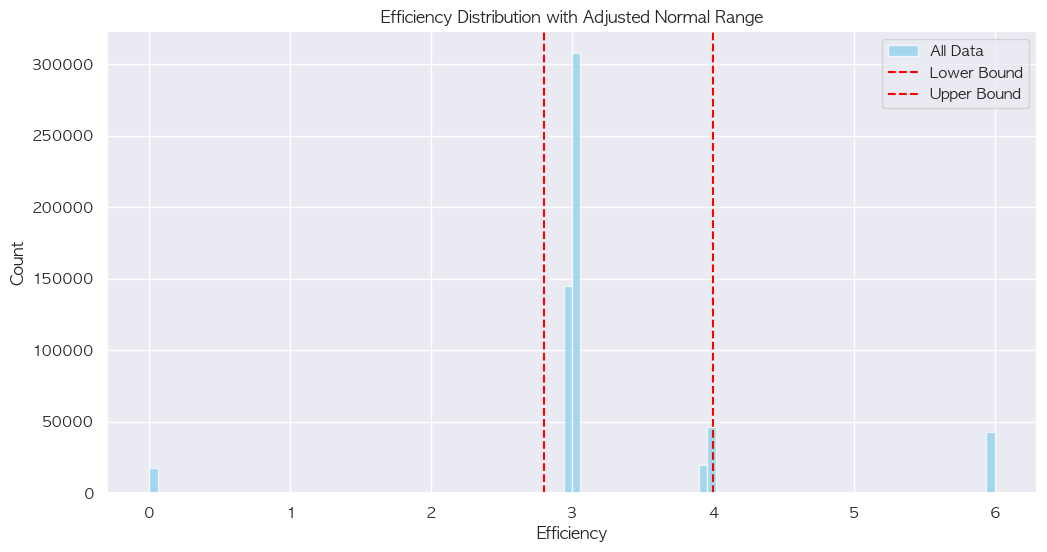

In [20]:
# 정상 범위 완화 예시 (도메인 지식 기반)
lower_bound = 2.8
upper_bound = 4.0

normal_range = df[(df['EFFICIENCY'] >= lower_bound) & (df['EFFICIENCY'] <= upper_bound)]
outliers = df[(df['EFFICIENCY'] < lower_bound) | (df['EFFICIENCY'] > upper_bound)]

print(f'완화된 정상 범위 내 데이터 개수: {len(normal_range)}')
print(f'완화된 정상 범위 밖 데이터 개수: {len(outliers)}')

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.hist(df['EFFICIENCY'].dropna(), bins=100, color='skyblue', alpha=0.7, label='All Data')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title('Efficiency Distribution with Adjusted Normal Range')
plt.xlabel('Efficiency')
plt.ylabel('Count')
plt.legend()
plt.show()

## 1단계. 이상치(범위 밖 데이터) 분석 — 시간, 알람, 생산량 확인

이상치 개수: 60755


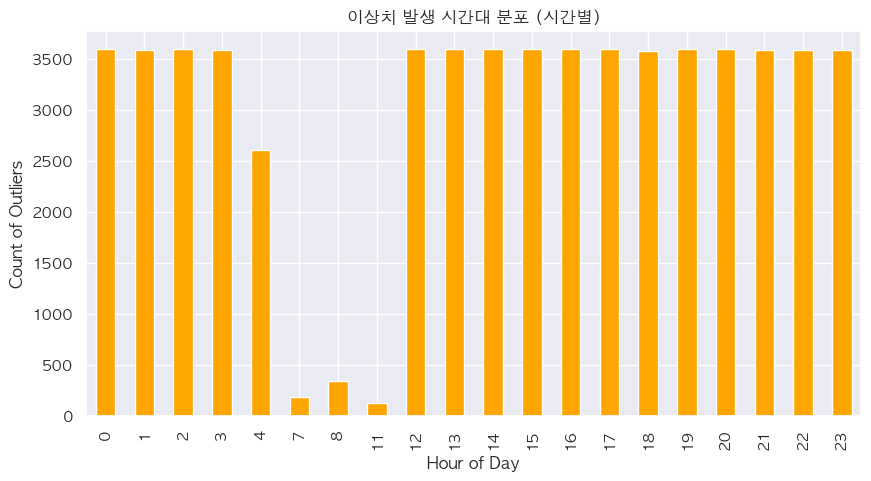

이상치 구간 알람 발생 비율: 0.00%
이상치 구간 평균 생산량: 32333.072973417824


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 정상 범위 재설정 (완화된 범위)
lower_bound = 2.8
upper_bound = 4.0

# 이상치 데이터 추출
outliers = df[(df['EFFICIENCY'] < lower_bound) | (df['EFFICIENCY'] > upper_bound)].copy()

print(f"이상치 개수: {len(outliers)}")

# 이상치가 발생한 시간대 분포 확인
outliers['Hour'] = outliers['Timestamp'].dt.hour
plt.figure(figsize=(10,5))
outliers['Hour'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('이상치 발생 시간대 분포 (시간별)')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Outliers')
plt.show()

# 알람 컬럼명 예시 (실제 컬럼명으로 교체)
alarm_col = 'MAIN_MOTOR_ALM.xlsx'

if alarm_col in outliers.columns:
    alarm_rate = outliers[alarm_col].mean()
    print(f"이상치 구간 알람 발생 비율: {alarm_rate:.2%}")
else:
    print(f"'{alarm_col}' 컬럼이 이상치 데이터에 없습니다.")

# 생산량 컬럼명 예시 (실제 컬럼명으로 교체)
output_col = 'OUTPUT_COUNT_DAY_1.xlsx'

if output_col in outliers.columns:
    avg_output = outliers[output_col].mean()
    print(f"이상치 구간 평균 생산량: {avg_output}")
else:
    print(f"'{output_col}' 컬럼이 이상치 데이터에 없습니다.")

### 이상치 구간 알람 발생 비율이 0.00%
→ 이상치(효율 값이 2.8~4.0 범위를 벗어난 구간)에서 알람은 전혀 발생하지 않았음.
→ 즉, 효율 변화가 크더라도 장비 이상 신호(알람)와는 무관할 가능성이 큼.

### 이상치 구간 평균 생산량이 32,333 정도
→ 이상치 구간에서도 생산량은 상당히 높은 수준.
→ 즉, 효율 값이 정상 범위를 벗어나도 생산에는 크게 지장이 없거나, 오히려 생산이 활발할 때도 효율 값이 변동할 수 있음.

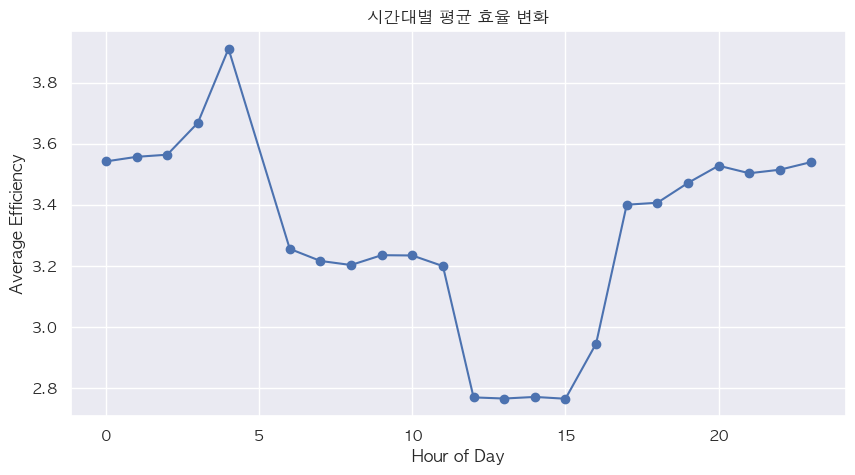

In [24]:
# 2단계. 시간별 평균 효율 계산
df['Hour'] = df['Timestamp'].dt.hour
efficiency_hourly = df.groupby('Hour')['EFFICIENCY'].mean()

plt.figure(figsize=(10,5))
efficiency_hourly.plot(marker='o')
plt.title('시간대별 평균 효율 변화')
plt.xlabel('Hour of Day')
plt.ylabel('Average Efficiency')
plt.grid(True)
plt.show()

In [26]:
# 모든 컬럼명 출력
print(df.columns.tolist())

['Timestamp', 'OUTPUT_COUNT_DAY_1.xlsx', 'CUTTING_SET_FREQ.xlsx', 'STATUS.xlsx', 'KO5_MOTOR_SET_FREQ.xlsx', 'METAL_OIL_SUPPLY_PRESS_CONTR.xlsx', 'KO4_MOTOR_SET_FREQ.xlsx', 'KO2_MOTOR_SET_FREQ.xlsx', 'MAIN_MOTOR_CURR.xlsx', 'KO3_MOTOR_SET_FREQ.xlsx', 'TONGS_INVERTER_ALM_ERR_CD.xlsx', 'KO1_MOTOR_SET_FREQ.xlsx', 'KO3_MOTOR_INVERTER_ALM.xlsx', 'MAIN_MOTOR_RPM.xlsx', 'TRANS_CURR.xlsx', 'KO1_MOTOR_CURR.xlsx', 'TRANS_INVERTER_ALM_ERR_CD.xlsx', 'TONGS_CAST_SET_FREQ.xlsx', 'KO4_MOTOR_INVERTER_ALM.xlsx', 'OIL_SUPPLY_PRESS.xlsx', 'KO2_MOTOR_INVERTER_ALM.xlsx', 'KO3_MOTOR_CURR.xlsx', 'TONGS_POS.xlsx', 'WORK_OIL_SUPPLY_PRESS.xlsx', 'METAL_TEMP_CONTROL.xlsx', 'TONGS_CAST_CURR.xlsx', 'CUTTING_INVERTER_ALM_ERR_CD.xlsx', 'KO4_MOTOR_CURR.xlsx', 'METAL_OIL_SUPPLY_PRESS_CUT.xlsx', 'MAIN_AIR_PRESS.xlsx', 'TRANS_SET_FREQ.xlsx', 'METAL_TEMP_CUT.xlsx', 'KO5_MOTOR_INVERTER_ALM.xlsx', 'MAIN_MOTOR_SET_FREQ.xlsx', 'OIL_PRESS_LEVEL_ALM.xlsx', 'CUTTING_CURR.xlsx', 'KO5_MOTOR_CURR.xlsx', 'KO2_MOTOR_CURR.xlsx', 'KO1_

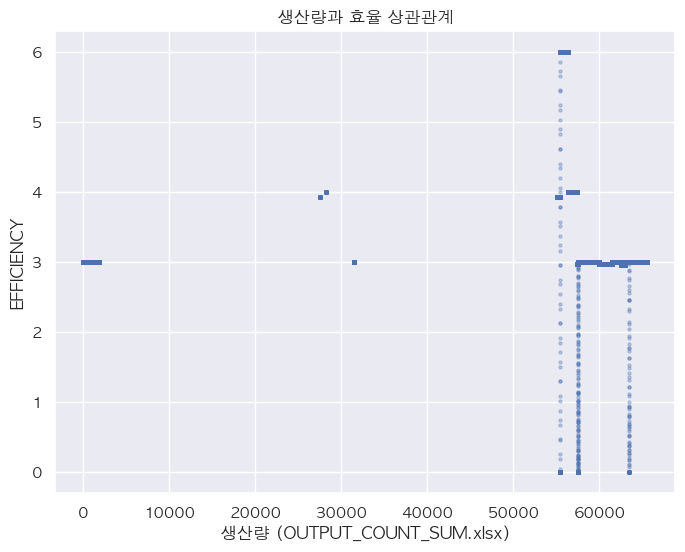

생산량과 효율 간 상관계수: 0.009


In [27]:
# 3단계.생산량 컬럼명
output_col = 'OUTPUT_COUNT_SUM.xlsx'

if output_col in df.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(df[output_col], df['EFFICIENCY'], alpha=0.3, s=5)
    plt.title('생산량과 효율 상관관계')
    plt.xlabel('생산량 (OUTPUT_COUNT_SUM.xlsx)')
    plt.ylabel('EFFICIENCY')
    plt.show()

    # 상관계수 계산
    corr = df[[output_col, 'EFFICIENCY']].corr().iloc[0,1]
    print(f'생산량과 효율 간 상관계수: {corr:.3f}')
else:
    print(f"'{output_col}' 컬럼이 데이터에 없습니다.")

- 결론: 회전속도 RPM과 주파수는 강한 양의 상관관계가 있었지만,
그 둘이 효율성(EFFICIENCY)에 영향을 미치지는 않았음. -> 값이 일정해서

In [29]:
# Step 1: 효율 변화량 계산
df['EFFICIENCY_DIFF'] = df['EFFICIENCY'].diff().abs()

# Step 2: 변화량 상위 5% 이상인 경우만 '급변'으로 정의
threshold = df['EFFICIENCY_DIFF'].quantile(0.95)
change_df = df[df['EFFICIENCY_DIFF'] > threshold]
stable_df = df[df['EFFICIENCY_DIFF'] <= threshold]

# Step 3: 생산량 평균 비교
output_col = 'OUTPUT_COUNT_SUM.xlsx'
change_mean = change_df[output_col].mean()
stable_mean = stable_df[output_col].mean()

print(f"▶ 효율 급변 구간 평균 생산량: {change_mean:,.2f}")
print(f"▶ 안정 구간 평균 생산량: {stable_mean:,.2f}")
print(f"▶ 변화량 기준 threshold: {threshold:.4f}")

▶ 효율 급변 구간 평균 생산량: 58,428.32
▶ 안정 구간 평균 생산량: 55,513.96
▶ 변화량 기준 threshold: 0.0000
